# Laboratory 2 - Exercises

In [18]:
# %pip install qiskit==1.2.4 qiskit-ibm-runtime qiskit_aer qiskit-dynamics==0.5.1
# %pip install matplotlib pylatexenc seaborn

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter  
from qiskit.quantum_info import Operator, Statevector
from qiskit_dynamics import Solver, Signal, DynamicsBackend
from qiskit_dynamics.pulse import InstructionToSignals
from qiskit.visualization import plot_histogram
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
import qiskit.pulse as pulse

X = Operator.from_label('X'); 
Y = Operator.from_label('Y'); 
Z = Operator.from_label('Z'); 
I = Operator.from_label('I');

def get_meas_signal(results,n,nshots):
    values = []
    for i in range(n):
        try:
            p1 = results.get_counts(i)['1'];
        except KeyError:
            p1 = 0; 
        values.append(p1/nshots);
    return values; 

def video_bloch_traj(y,mod=1):
    for i in range(len(y)):
        if np.mod(i,mod) != 0:
                continue;
        try:
            display.display(y[i].draw("bloch"))
            display.clear_output(wait=True)
            time.sleep(0.001)
        except KeyboardInterrupt:
            break

def plot_bloch_traj(states,mod=1):
    from qiskit.visualization.bloch import Bloch
    from qiskit.quantum_info import Operator
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    X = Operator.from_label('X'); 
    Y = Operator.from_label('Y'); 
    Z = Operator.from_label('Z'); 

    cmap = mpl.colormaps["winter"]
    blues = cmap(np.linspace(0,1,int(np.ceil(len(states)/mod))));
    bls = [];
    for i in range(len(blues)):
        bls.append(mpl.colors.rgb2hex(blues[i]));
    blues = bls; 

    _bloch = Bloch()
    _bloch.point_marker = ['o']
    _bloch.point_color = blues; 

    for i in range(len(states)):
        if np.mod(i,mod) != 0:
            continue;
        _bloch.add_points([states[i].expectation_value(X).real, states[i].expectation_value(Y).real, states[i].expectation_value(Z).real])
    
    _bloch.render(); 

def plot_qubit_dynamics(sol, t_eval):
    from qiskit.quantum_info import Operator
    
    X = Operator.from_label('X');
    Y = Operator.from_label('Y');
    Z = Operator.from_label('Z');

    n_times = len(sol.y)
    x_data = np.zeros((n_times,))
    y_data = np.zeros((n_times,))
    z_data = np.zeros((n_times,))

    for t_i, sol_t in enumerate(sol.y):
        x_data[t_i] = sol_t.expectation_value(X).real
        y_data[t_i] = sol_t.expectation_value(Y).real
        z_data[t_i] = sol_t.expectation_value(Z).real

    _, ax = plt.subplots(figsize = (20, 6))
    fontsize = 16;
    plt.rcParams.update({'font.size': fontsize})
    plt.plot(t_eval/1e-9, x_data, label = '$\\langle X \\rangle$')
    plt.plot(t_eval/1e-9, y_data, label = '$\\langle Y \\rangle$')
    plt.plot(t_eval/1e-9, z_data, label = '$\\langle Z \\rangle$')
    plt.legend(fontsize = fontsize)
    ax.set_xlabel('$t$ [ns]', fontsize = fontsize)
    ax.set_title('Bloch vector vs. $t$', fontsize = fontsize)
    plt.show()

def fit_function(x_values, y_values, function, init_params):
    from scipy.optimize import curve_fit
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    return fitparams, y_fit

def plot_populations(sol,tend):
    pop0 = [psi.probabilities()[0] for psi in sol.y]
    pop1 = [psi.probabilities()[1] for psi in sol.y]

    fig = plt.figure(figsize=(8, 5))
    plt.plot(sol.t, pop0, lw=3, label="Population in |0>")
    plt.plot(sol.t, pop1, lw=3, label="Population in |1>")
    plt.xlabel("Time (ns)")
    plt.ylabel("Population")
    plt.legend(frameon=False)
    plt.ylim([0, 1.05])
    plt.xlim([0, tend])
    plt.vlines(tend, 0, 1.05, "k", linestyle="dashed")

## Requirements and helpers

In [19]:
# %pip install qiskit==1.2.4 qiskit-ibm-runtime qiskit_aer qiskit-dynamics==0.5.1
# %pip install matplotlib pylatexenc seaborn

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter  
from qiskit.quantum_info import Operator, Statevector
from qiskit_dynamics import Solver, Signal, DynamicsBackend
from qiskit_dynamics.pulse import InstructionToSignals
from qiskit.visualization import plot_histogram
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
import qiskit.pulse as pulse

X = Operator.from_label('X'); 
Y = Operator.from_label('Y'); 
Z = Operator.from_label('Z'); 
I = Operator.from_label('I');

def get_meas_signal(results,n,nshots):
    values = []
    for i in range(n):
        try:
            p1 = results.get_counts(i)['1'];
        except KeyError:
            p1 = 0; 
        values.append(p1/nshots);
    return values; 

def video_bloch_traj(y,mod=1):
    for i in range(len(y)):
        if np.mod(i,mod) != 0:
                continue;
        try:
            display.display(y[i].draw("bloch"))
            display.clear_output(wait=True)
            time.sleep(0.001)
        except KeyboardInterrupt:
            break

def plot_bloch_traj(states,mod=1):
    from qiskit.visualization.bloch import Bloch
    from qiskit.quantum_info import Operator
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    X = Operator.from_label('X'); 
    Y = Operator.from_label('Y'); 
    Z = Operator.from_label('Z'); 

    cmap = mpl.colormaps["winter"]
    blues = cmap(np.linspace(0,1,int(np.ceil(len(states)/mod))));
    bls = [];
    for i in range(len(blues)):
        bls.append(mpl.colors.rgb2hex(blues[i]));
    blues = bls; 

    _bloch = Bloch()
    _bloch.point_marker = ['o']
    _bloch.point_color = blues; 

    for i in range(len(states)):
        if np.mod(i,mod) != 0:
            continue;
        _bloch.add_points([states[i].expectation_value(X).real, states[i].expectation_value(Y).real, states[i].expectation_value(Z).real])
    
    _bloch.render();  
    
def plot_qubit_dynamics(sol, t_eval):
    from qiskit.quantum_info import Operator
    
    X = Operator.from_label('X');
    Y = Operator.from_label('Y');
    Z = Operator.from_label('Z');

    n_times = len(sol.y)
    x_data = np.zeros((n_times,))
    y_data = np.zeros((n_times,))
    z_data = np.zeros((n_times,))

    for t_i, sol_t in enumerate(sol.y):
        x_data[t_i] = sol_t.expectation_value(X).real
        y_data[t_i] = sol_t.expectation_value(Y).real
        z_data[t_i] = sol_t.expectation_value(Z).real

    _, ax = plt.subplots(figsize = (20, 6))
    fontsize = 16;
    plt.rcParams.update({'font.size': fontsize})
    plt.plot(t_eval/1e-9, x_data, label = '$\\langle X \\rangle$')
    plt.plot(t_eval/1e-9, y_data, label = '$\\langle Y \\rangle$')
    plt.plot(t_eval/1e-9, z_data, label = '$\\langle Z \\rangle$')
    plt.legend(fontsize = fontsize)
    ax.set_xlabel('$t$ [ns]', fontsize = fontsize)
    ax.set_title('Bloch vector vs. $t$', fontsize = fontsize)
    plt.show()

def fit_function(x_values, y_values, function, init_params):
    from scipy.optimize import curve_fit
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    return fitparams, y_fit

def plot_populations(sol,tend):
    pop0 = [psi.probabilities()[0] for psi in sol.y]
    pop1 = [psi.probabilities()[1] for psi in sol.y]

    fig = plt.figure(figsize=(8, 5))
    plt.plot(sol.t, pop0, lw=3, label="Population in |0>")
    plt.plot(sol.t, pop1, lw=3, label="Population in |1>")
    plt.xlabel("Time (ns)")
    plt.ylabel("Population")
    plt.legend(frameon=False)
    plt.ylim([0, 1.05])
    plt.xlim([0, tend])
    plt.vlines(tend, 0, 1.05, "k", linestyle="dashed")

## Exercise 1

Consider a two-level system with natural frequency $\omega = 2\pi\cdot\text{5 GHz}$ coupled to a resonant drive with driving strength $\Omega = 2\pi\cdot\text{50 MHz}$ oriented along the $x$ axis. The following pulse schedule is loaded in the control system: 
* a $\pi/4$-pulse around $y$ at full amplitude
* an idle time of 10 ns
* a $\pi/4$-pulse around $x$ at full amplitude
* an idle time of 5 ns. 

Write a Qiskit program to simulate the pulse schedule using the Qiskit Dynamics extension. Plot the expectation values $\langle X\rangle$, $\langle Y\rangle$, $\langle Z\rangle$ for (i) a Solver in a static frame and (ii) a Solver in a rotating frame. Finally, plot the state trajectory on the Bloch sphere for each of the pulse schedule components.  

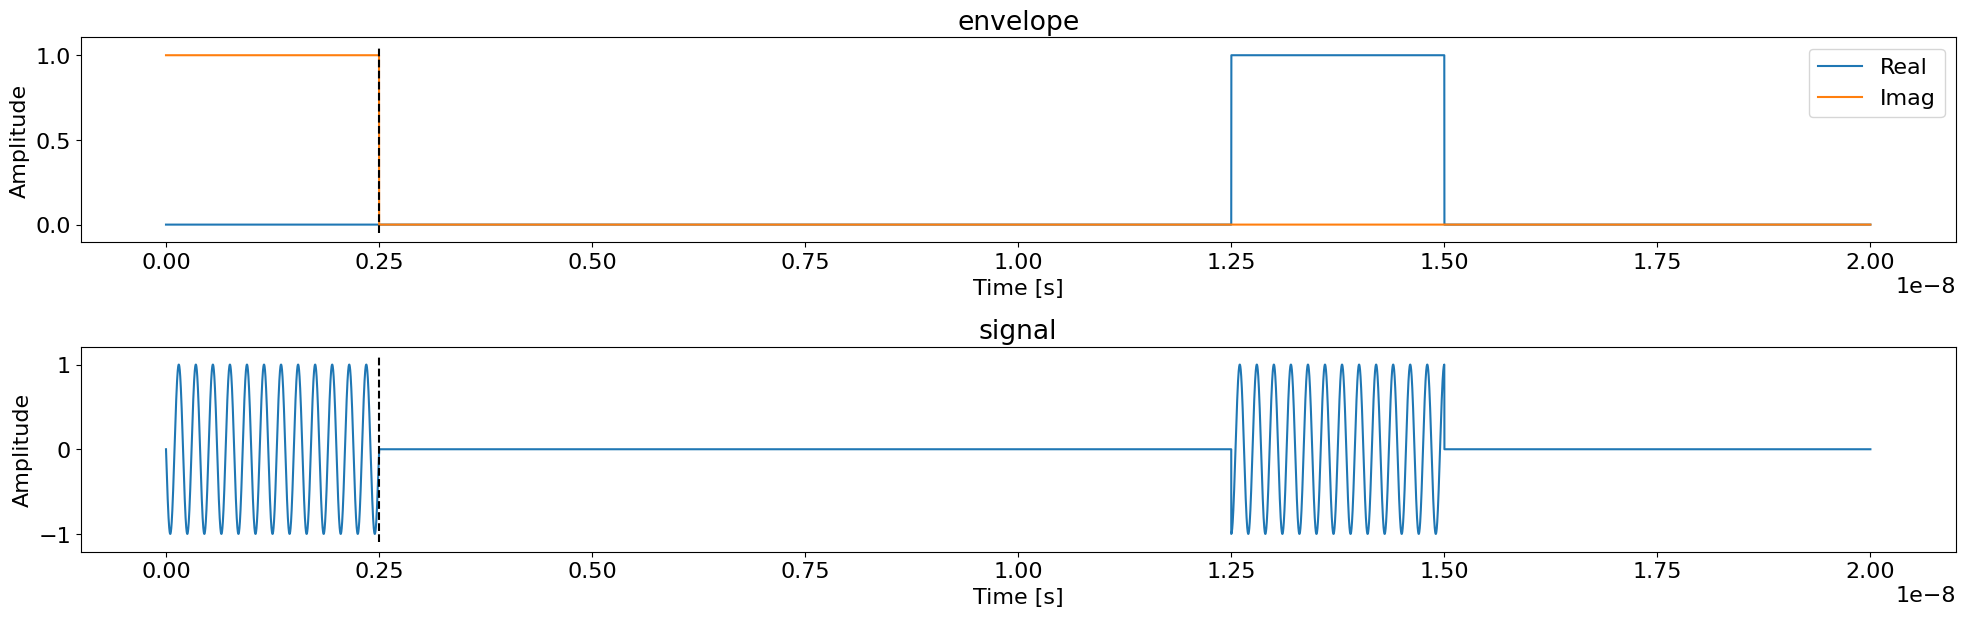

In [20]:
# 1. Defining the constants
omega = 2*np.pi*5e09
Omega = 2*np.pi*50e06

# 2. Creating the signals

# 2.1 Envelope constrution
t_gate = np.pi/(4*Omega)
t_idle1 = 10e-9
t_idle2 = 5e-9
tend = 2*t_gate + t_idle1 + t_idle2
env_func = lambda t: 1j*( t < t_gate) + 0.*(((t >= t_gate) & (t <= t_gate+t_idle1)) | (t >= 2*t_gate+t_idle1)) + 1.*((t > t_gate + t_idle1) & (t < 2*t_gate + t_idle1))

# 2.2 Signal creation
signal = Signal(envelope=env_func, carrier_freq = omega/2/np.pi)

# 3. Graphics
fig, axs = plt.subplots(2, 1, figsize=(20, 6))
fig.tight_layout(h_pad=3)
for ax, title in zip(axs, ["envelope", "signal"]):
    signal.draw(0, tend, 50000, title, axis=ax)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.set_title(title)
    ax.vlines(t_gate, ax.get_ylim()[0], ax.get_ylim()[1], "k", linestyle="dashed")

# 4 System hamiltonian

hdrift = 1/2 * omega * Z;                   # Natural Hamiltonian (precession)
hdrive = Omega * X;                         # Interaction Hamiltonian (driving field)

solver = Solver(static_hamiltonian=hdrift, hamiltonian_operators=[hdrive]);

# 4.1 Simulation using time evolution in non rotating frame - static frame
t_eval = np.linspace(0,tend,20000)
y_0 = Statevector.from_label('0')
sol = solver.solve(t_span = [0,tend], y0=y_0, signals = [signal], t_eval = t_eval)


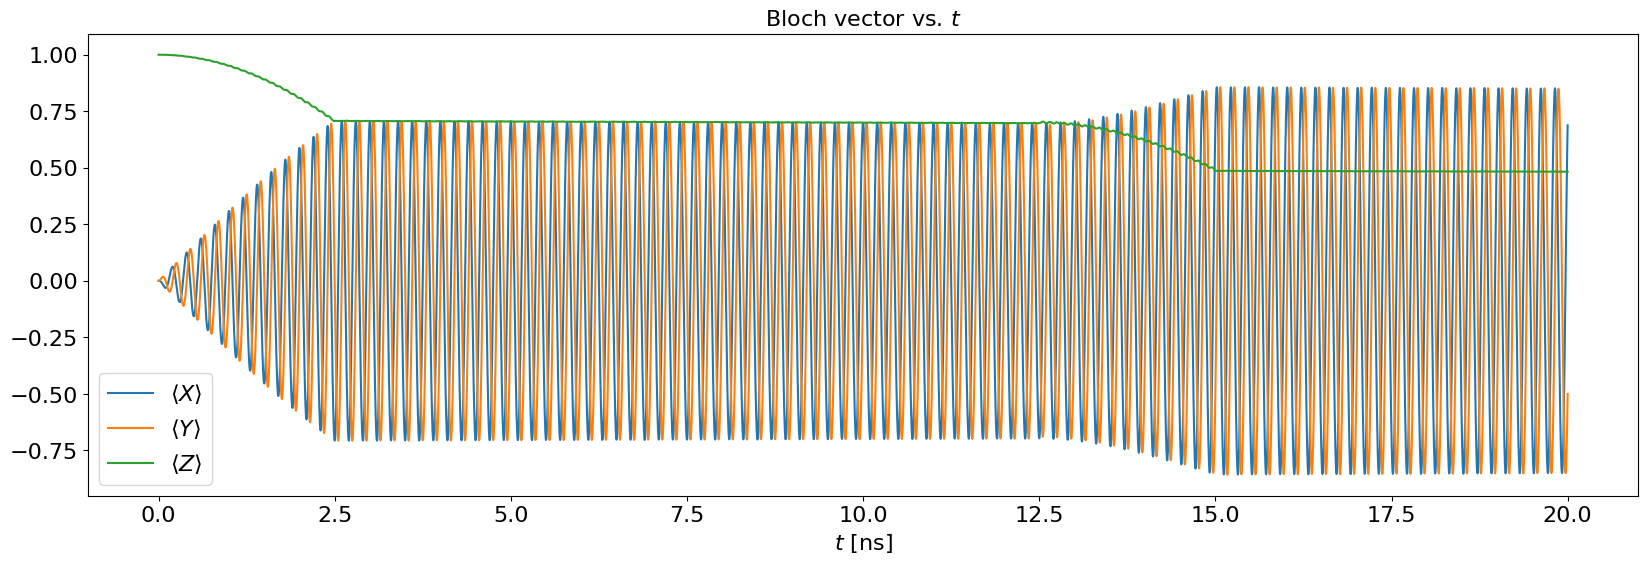

In [21]:
# 4.2 Static Hamiltonian plots of <X>, <Y>, and <Z>
plot_qubit_dynamics(sol,t_eval)

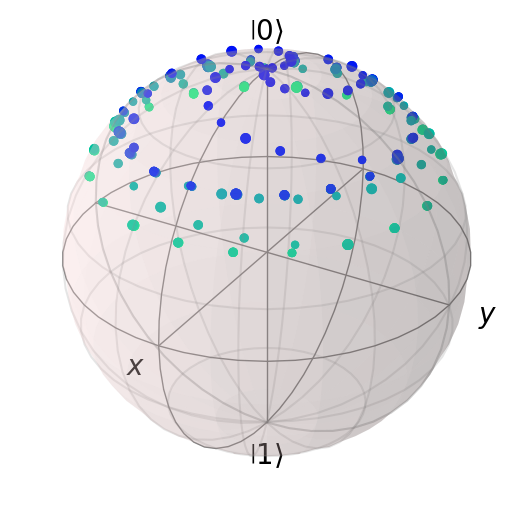

In [22]:
# 4.3 Bloch sphere trajectories for STATIC HAMILTONIAN
video_bloch_traj(sol.y,30)
plot_bloch_traj(sol.y,70)

Let's check the qubit's state after each pulse or idle time accordingly:

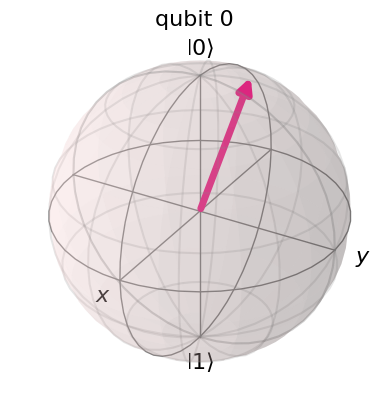

In [23]:
# 4.4.1 Bloch sphere state rep. after first gate:
ngate = int( np.ceil(t_gate/np.diff(t_eval)[0]))
sol.y[ngate].draw("bloch")

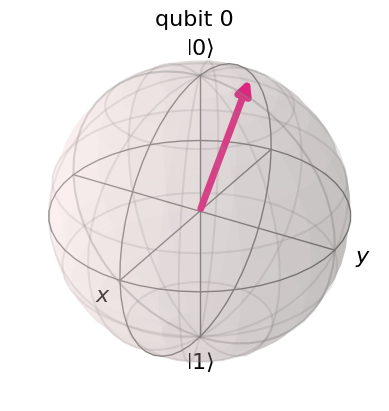

In [24]:
# 4.4.2 Bloch sphere state rep. after first idle time:
nidle1 = ngate + int( np.ceil(t_idle1/np.diff(t_eval)[0]))
sol.y[nidle1].draw("bloch")

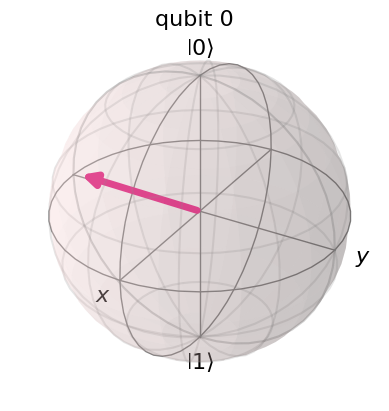

In [25]:
# 4.4.3 Bloch sphere state rep. after first idle time:
ngate2 = ngate + nidle1
sol.y[ngate2].draw("bloch")

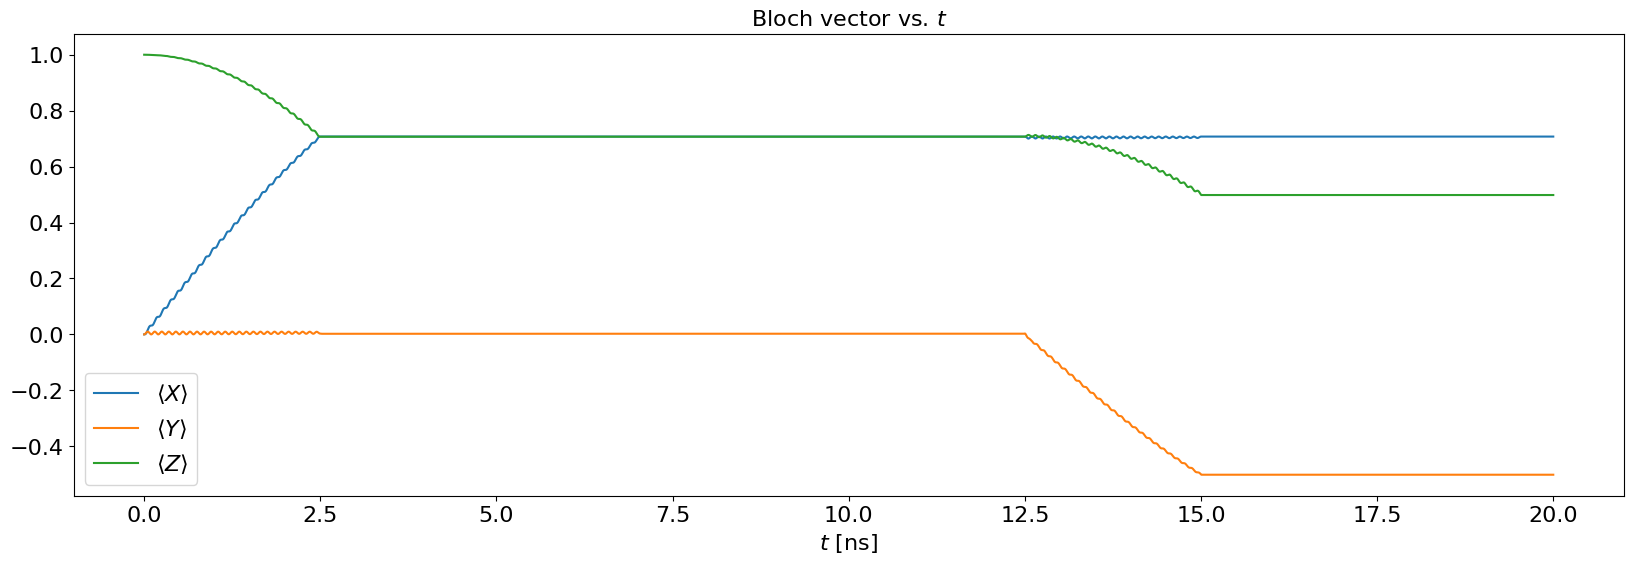

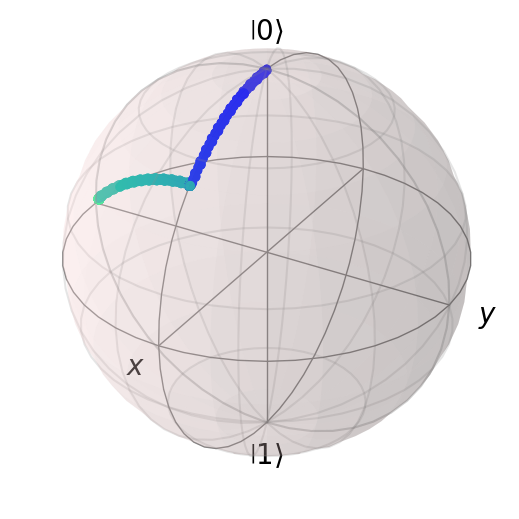

In [27]:
# 4.5 Rotating frame simulation
solver = Solver(static_hamiltonian = hdrift, hamiltonian_operators=[hdrive], rotating_frame = hdrift)
sol = solver.solve(t_span=[0,tend],y0 = y_0, signals=[signal], t_eval = t_eval)
plot_qubit_dynamics(sol,t_eval)
plot_bloch_traj(sol.y,50)

## Exercise 2

Consider a two-level system with natural frequency $\omega = 2\pi\cdot\text{4 GHz}$ coupled to a resonant drive with driving strength $\Omega = 2\pi\cdot\text{50 MHz}$. 

a. Calibrate the drive amplitude required to operate $\pi$ and $\pi/2$ gates with pulses of length 100 dt where dt = 1/4.5 GHz. <br>
b. Derive the pulse schedule to operate $\hat{H}$, recalling $\hat{H}=\hat{X}\hat{Y}^{1/2}$.<br>
c. Apply the pulse schedule to a qubit prepared in state $|+\rangle$. Plot the state trajectory on the Bloch sphere and the probability of measuring the $|0\rangle$ and $|1\rangle$ states over time. 

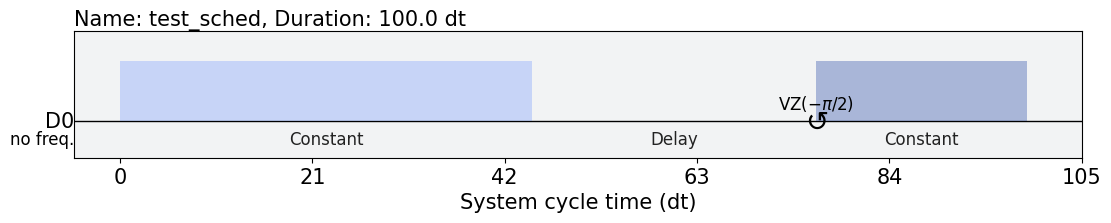

In [32]:
# 1. System specifications
omega = 2*np.pi*4e09
Omega = 2*np.pi*50e06

hdrift = 1/2 * omega * Z
hdrive = Omega * X

dt = 1/(4.5e09)
dgate_pi = int(np.ceil((np.pi/Omega)/dt))
dgate_pi_half = int(np.ceil((0.5*np.pi/Omega/dt)))
didle = 99 - dgate_pi - dgate_pi_half

# Pulse crestion
with pulse.build(name="test_sched") as sxp:
    with pulse.align_sequential():
        pulse.play(pulse.library.Constant(dgate_pi,1), pulse.DriveChannel(0))
        pulse.delay(didle, pulse.DriveChannel(0))
        pulse.shift_phase(np.pi/2, pulse.DriveChannel(0))
        pulse.play(pulse.library.Constant(dgate_pi_half,1), pulse.DriveChannel(0))
        pulse.acquire(duration=1, qubit_or_channel=0, register=pulse.MemorySlot(0))

sxp.draw()


2.222222222222222e-08


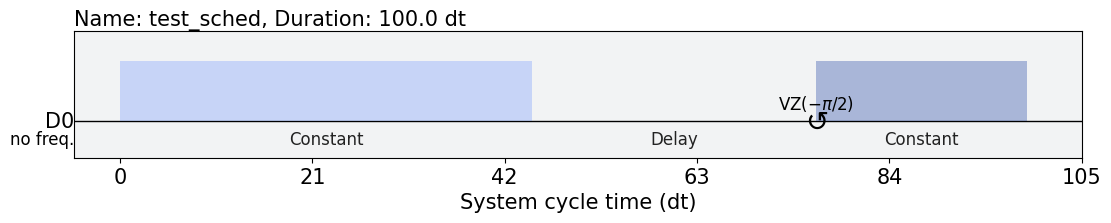

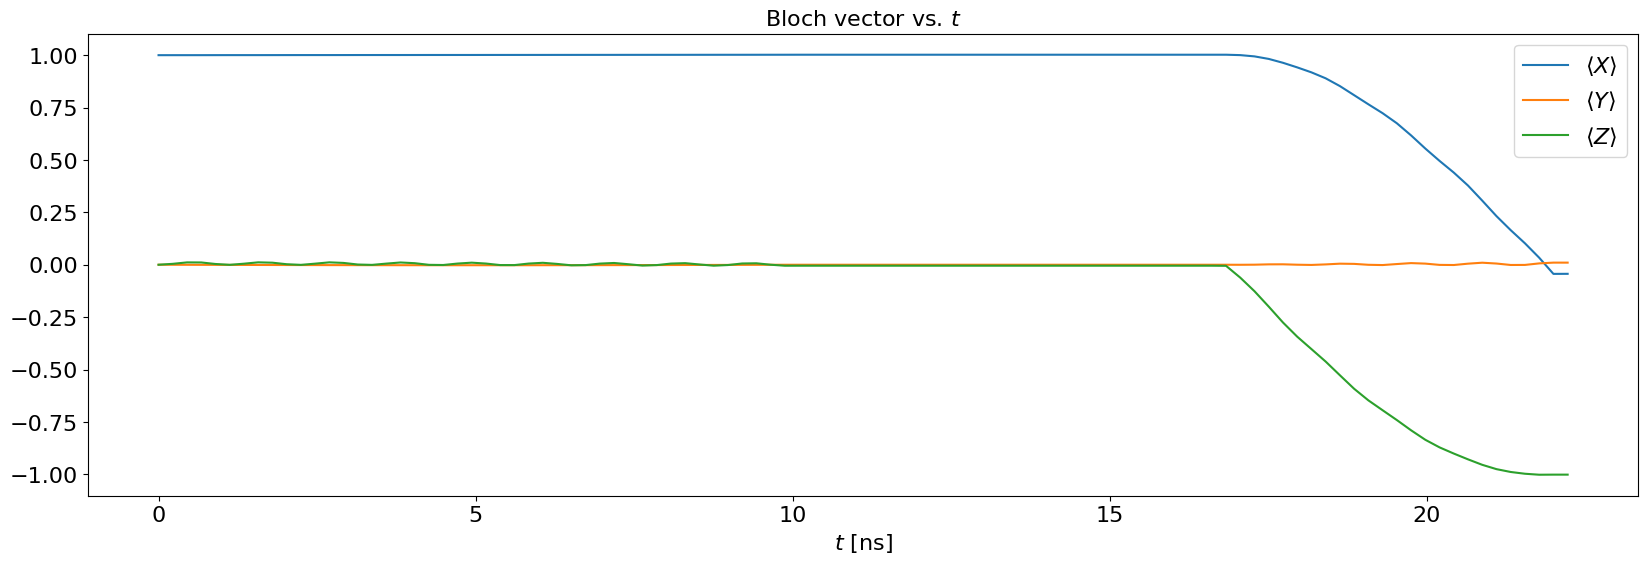

{'0': 485, '1': 515}

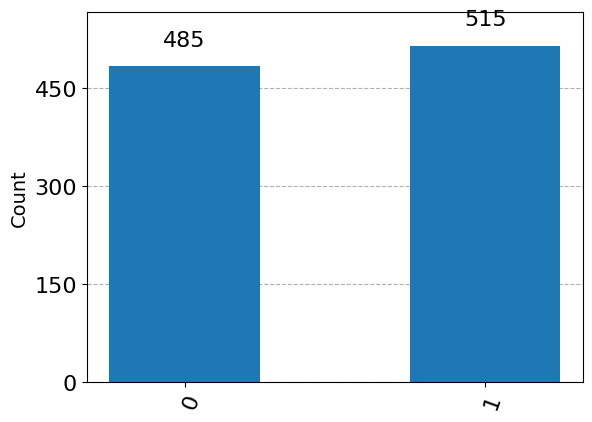

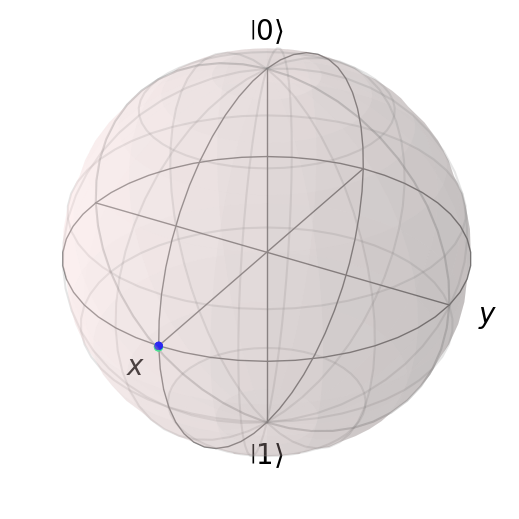

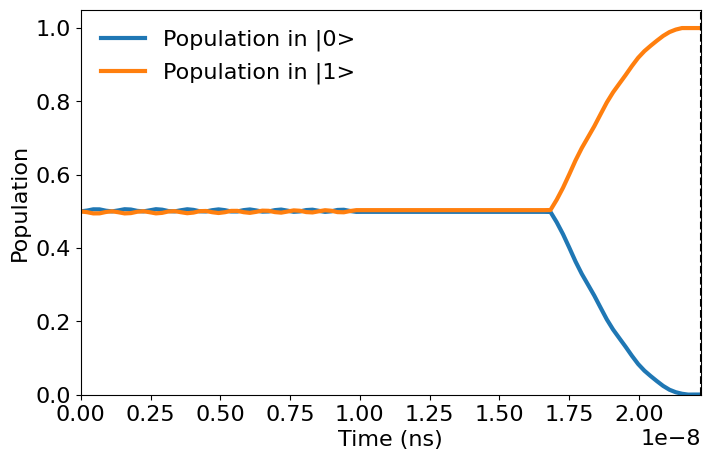

In [34]:
solver = Solver(static_hamiltonian=hdrift, hamiltonian_operators=[hdrive], hamiltonian_channels=["d0"], rotating_frame=hdrift, channel_carrier_freqs={"d0":omega/2/np.pi}, dt=dt);
backend = DynamicsBackend(solver=solver,subsystem_dims=[2]);

y0 = y_0 = Statevector.from_label('+')
tend = 100*dt
t_eval = np.linspace(0,tend,100); 
sol = solver.solve(t_span=[0,tend], y0=y0, signals=sxp, t_eval=t_eval)

#########################################
# Graphics
#########################################
print(tend)
display.display(sxp.draw())
plot_qubit_dynamics(sol,t_eval); 
plot_bloch_traj(sol.y,50); 
plot_populations(sol,tend)

job = backend.run([sxp], shots=1000, meas_return="single")
result = job.result()
display.display(result.get_counts())

plot_histogram(result.get_counts())